# **Task 03**

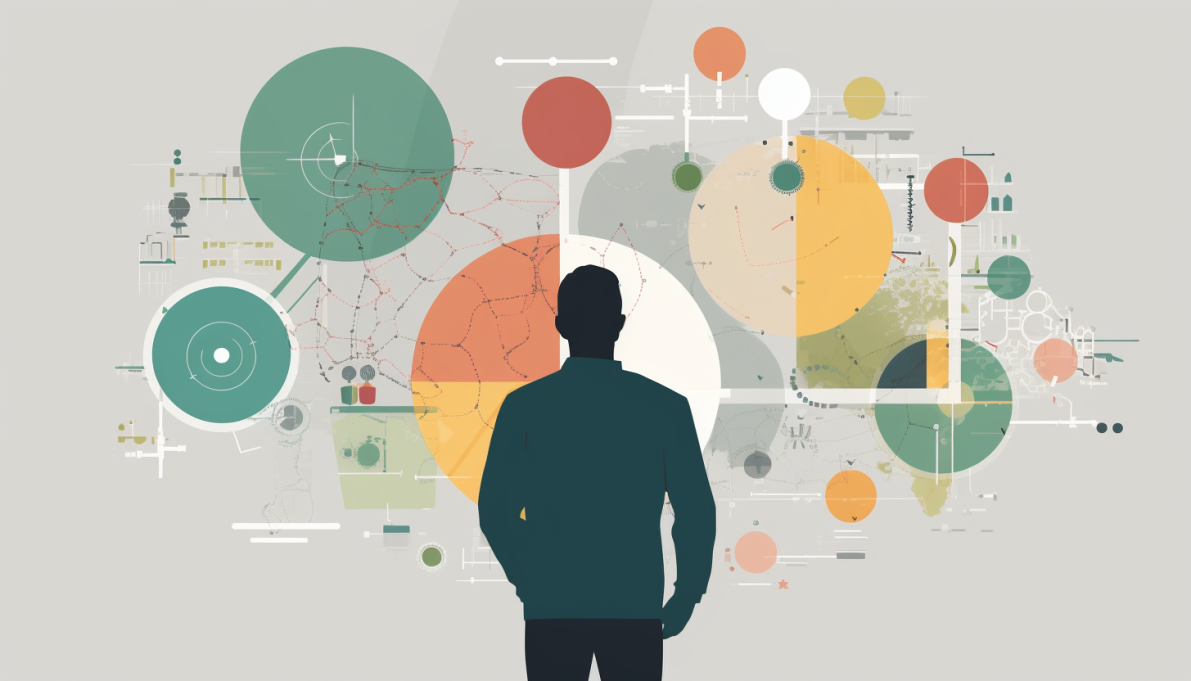

<a id = "1"></a>
# 1. Library and Input File

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

In [2]:
#import dataset from local
from google.colab import files
uploaded = files.upload()

Saving bank-full.csv to bank-full.csv


In [3]:
df = pd.read_csv('bank-full.csv', delimiter=';')

In [4]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


### **Preprocessing**

In [5]:
df.isnull().sum()

,0
age,0
job,0
marital,0
education,0
default,0
balance,0
housing,0
loan,0
contact,0
day,0


In [6]:
# Check for duplicates
duplicated_rows = df[df.duplicated()]
print(f"Duplicates number: {duplicated_rows.shape[0]}")

# Show duplicates if any
if not duplicated_rows.empty:
    print(duplicated_rows)


Duplicates number: 0


In [7]:
# Check unique categories for each categorical column
categorical_cols = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome', 'y']
for col in categorical_cols:
    print(f"Unique value in  {col}:")
    print(df[col].unique())
    print()


Unique value in  job:
['management' 'technician' 'entrepreneur' 'blue-collar' 'unknown'
 'retired' 'admin.' 'services' 'self-employed' 'unemployed' 'housemaid'
 'student']

Unique value in  marital:
['married' 'single' 'divorced']

Unique value in  education:
['tertiary' 'secondary' 'unknown' 'primary']

Unique value in  default:
['no' 'yes']

Unique value in  housing:
['yes' 'no']

Unique value in  loan:
['no' 'yes']

Unique value in  contact:
['unknown' 'cellular' 'telephone']

Unique value in  month:
['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'jan' 'feb' 'mar' 'apr' 'sep']

Unique value in  poutcome:
['unknown' 'failure' 'other' 'success']

Unique value in  y:
['no' 'yes']



# **One Hot Encoding Method texte en gras**

In [9]:

# Assuming 'y' is the target variable and needs to be label encoded
label_encoder = LabelEncoder()
df['y'] = label_encoder.fit_transform(df['y'])

# One-hot encode categorical features
categorical_cols = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome']
encoder = OneHotEncoder(handle_unknown='ignore')
encoded_data = encoder.fit_transform(df[categorical_cols])
encoded_df = pd.DataFrame(encoded_data.toarray(), columns=encoder.get_feature_names_out(categorical_cols))


### Split the Data

In [10]:
# Drop original categorical columns and concatenate encoded features
df = df.drop(categorical_cols, axis=1)
df = pd.concat([df, encoded_df], axis=1)

# Split data
X = df.drop('y', axis=1)
y = df['y']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### **Build the Decision Tree Classifier**

In [11]:
# Create and train the decision tree classifier
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)


# Make predictions on the test set
y_pred = clf.predict(X_test)

# **Evaluation**

In [12]:
# Evaluate the model
print(classification_report(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.93      0.93      7952
           1       0.48      0.49      0.48      1091

    accuracy                           0.87      9043
   macro avg       0.70      0.71      0.71      9043
weighted avg       0.87      0.87      0.87      9043

Accuracy: 0.8732721441999336


# **Visualization**

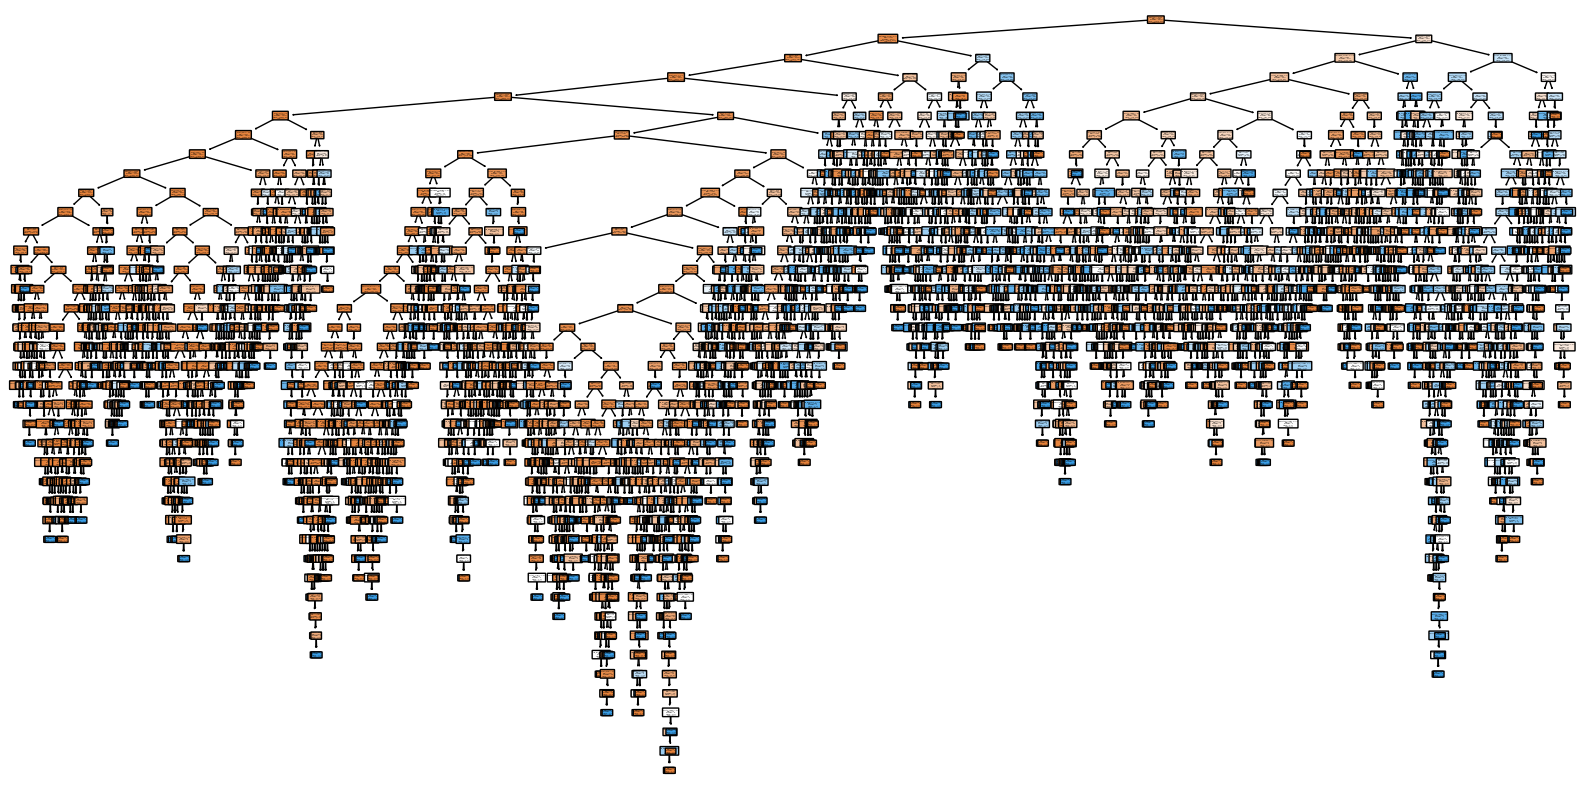

In [13]:
# Visualize the decision tree
plt.figure(figsize=(20,10))
plot_tree(clf, feature_names=X.columns, class_names=['no', 'yes'], filled=True, rounded=True)
plt.show()